# Importing Libraries

In [159]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

import matplotlib.pyplot as plt
import seaborn as sns


# Reading Data 

In [160]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
label = pd.read_csv('y_test.csv')

# Analysis of data on various factors

In [161]:
print(X_train.head())
print(y_train.head())
print(X_train.info())
print(X_train.describe())
print(X_train.isnull().sum())
print(X_test.info())
print(X_test.describe())
print(X_test.isnull().sum())

   carID     brand      model  year transmission  mileage fuelType    tax  \
0  13207    hyundi   Santa Fe  2019    Semi-Auto     4223   Diesel  145.0   
1  17314  vauxhall        GTC  2015       Manual    47870   Diesel  125.0   
2  12342      audi        RS4  2019    Automatic     5151   Petrol  145.0   
3  13426        vw   Scirocco  2016    Automatic    20423   Diesel   30.0   
4  16004     skoda      Scala  2020    Semi-Auto     3569   Petrol  145.0   

    mpg  engineSize  
0  39.8         2.2  
1  60.1         2.0  
2  29.1         2.9  
3  57.6         2.0  
4  47.1         1.0  
   carID  price
0  13207  31995
1  17314   7700
2  12342  58990
3  13426  12999
4  16004  16990
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         4960 non-null   int64  
 1   brand         4960 non-null   object 
 2   model         4960 non-nu

# Droping the attributes

In [162]:
drop = ['carID', 'brand']
trainx = X_train.drop(columns=drop,axis=1)
testx = X_test.drop(columns=drop,axis=1)

In [163]:
obj = trainx.select_dtypes(include = object).columns
num = trainx.select_dtypes(exclude = object).columns

# Encoding the categorical Data using Label Encoding

In [164]:
df = pd.concat([trainx.assign(ind='train'),testx.assign(ind='test')])
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df[obj] = df[obj].apply(encoder.fit_transform)
traind = df[df['ind']=='train'].drop(columns='ind')
testd = df[df['ind']=='test'].drop(columns='ind')

In [165]:
traind

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,69,2019,3,4223,0,145.0,39.8,2.2
1,30,2015,1,47870,0,125.0,60.1,2.0
2,58,2019,0,5151,4,145.0,29.1,2.9
3,71,2016,0,20423,0,30.0,57.6,2.0
4,70,2020,3,3569,4,145.0,47.1,1.0
...,...,...,...,...,...,...,...,...
4955,26,2015,0,24314,0,125.0,56.6,2.1
4956,0,2017,0,18000,0,145.0,51.4,3.0
4957,11,2015,1,84932,0,30.0,60.1,2.0
4958,3,2017,3,30150,0,145.0,62.8,3.0


# Analysis of the different Attributes with Dependent Attribute

/home/shield/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


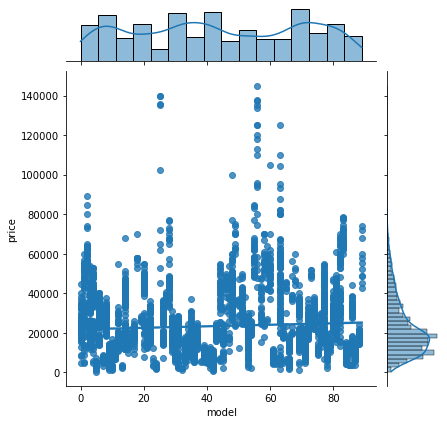

In [166]:
sns.jointplot(traind.model, y_train.price, kind = "reg")
plt.show()

/home/shield/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


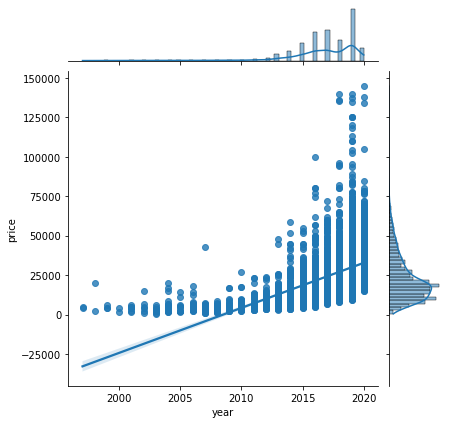

In [167]:
sns.jointplot(traind.year, y_train.price, kind = "reg")
plt.show()

/home/shield/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


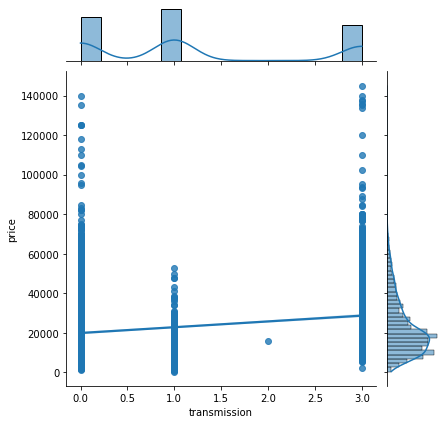

In [168]:
sns.jointplot(traind.transmission, y_train.price, kind = "reg")
plt.show()

/home/shield/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


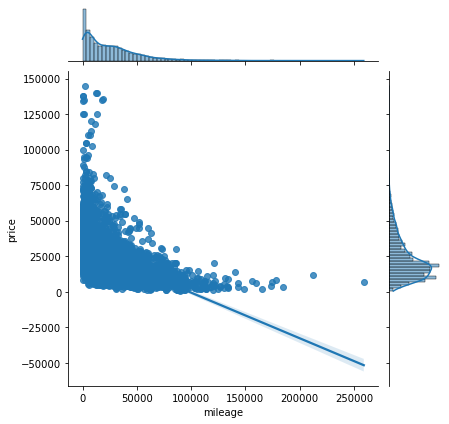

In [169]:
sns.jointplot(traind.mileage, y_train.price, kind = "reg")
plt.show()

/home/shield/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


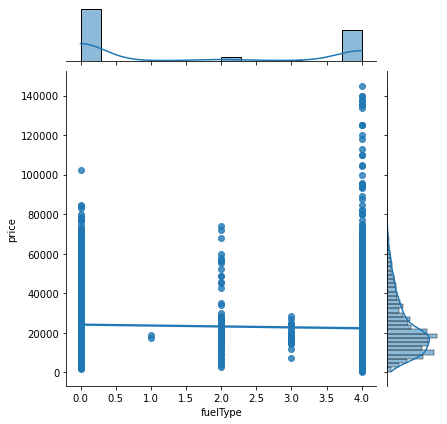

In [170]:
sns.jointplot(traind.fuelType, y_train.price, kind = "reg")
plt.show()

/home/shield/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


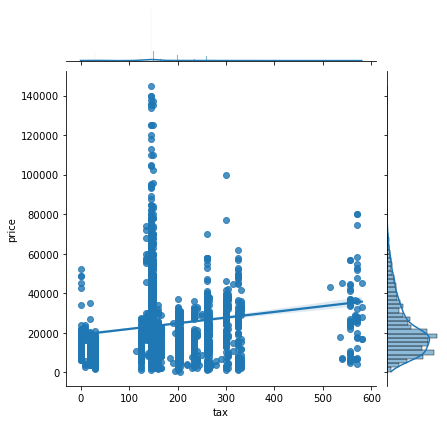

In [171]:
sns.jointplot(traind.tax, y_train.price, kind = "reg")
plt.show()

/home/shield/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


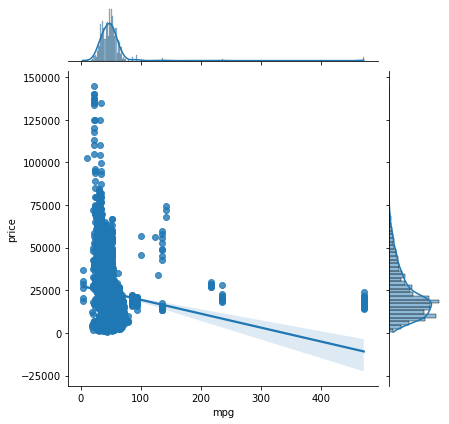

In [172]:
sns.jointplot(traind.mpg, y_train.price, kind = "reg")
plt.show()

/home/shield/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


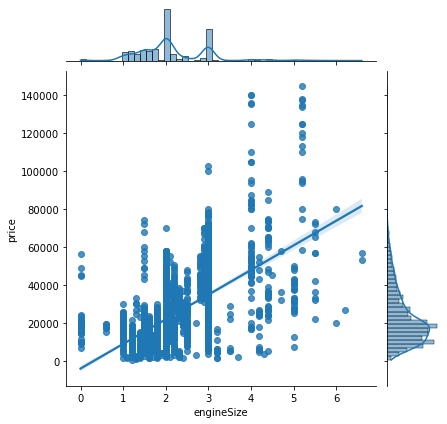

In [173]:
sns.jointplot(traind.engineSize, y_train.price, kind = "reg")
plt.show()

# Scaling the data using feautre scaling standardisation

In [174]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trains = scaler.fit_transform(traind)
tests = scaler.transform(testd)

In [175]:
trains

array([[ 0.96270737,  0.78443036,  1.52341148, ..., -0.08899343,
        -0.29574449,  0.09581413],
       [-0.5264344 , -0.60265505, -0.1789927 , ..., -0.33172502,
         0.27220045, -0.15757862],
       [ 0.54269302,  0.78443036, -1.03019479, ..., -0.08899343,
        -0.59510464,  0.98268877],
       ...,
       [-1.25191373, -0.60265505, -0.1789927 , ..., -1.4847001 ,
         0.27220045, -0.15757862],
       [-1.5573787 ,  0.09088765,  1.52341148, ..., -0.08899343,
         0.34773993,  1.10938515],
       [ 0.848158  , -0.9494264 , -1.03019479, ..., -0.02831053,
         0.17148115,  1.10938515]])

# Calculating the Feature Importance

Feature: 0, Score: 1607.72234
Feature: 1, Score: 4795.33066
Feature: 2, Score: 489.40376
Feature: 3, Score: -3769.33351
Feature: 4, Score: 757.47698
Feature: 5, Score: -1063.27324
Feature: 6, Score: 966.04659
Feature: 7, Score: 11098.66900


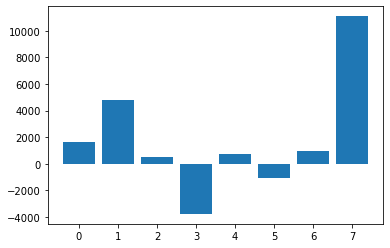

In [176]:
xt,xv,yt,yv = train_test_split(trains, y_train['price'], test_size=0.2,random_state=24)
model = LinearRegression()
model.fit(xt,yt)
importance = model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Application of the Linear Regression

In [177]:
model = LinearRegression()
model.fit(xt,yt)
pred = model.predict(xv)
print(r2_score(yv,pred))

0.6702766155287029


# Application of the Decision Tree Regression

In [178]:
max_r2 = 0.00
dep = 1

for i in range(0,25):
    regr_1 = DecisionTreeRegressor(max_depth=i+1)
    regr_1.fit(xt,yt)

    y_1 = regr_1.predict(xv)

    print("Coefficient of determination in Max Depth = %d: %.16f" % (i+2,r2_score(yv, y_1)))

    if max_r2< r2_score(yv , y_1):
        max_r2 = r2_score(yv , y_1)

Coefficient of determination in Max Depth = 2: 0.3551606350804297
Coefficient of determination in Max Depth = 3: 0.5806997241031087
Coefficient of determination in Max Depth = 4: 0.6582925149940793
Coefficient of determination in Max Depth = 5: 0.7435752890529120
Coefficient of determination in Max Depth = 6: 0.7318981509627938
Coefficient of determination in Max Depth = 7: 0.7677805673051984
Coefficient of determination in Max Depth = 8: 0.7670230200100316
Coefficient of determination in Max Depth = 9: 0.7701705234995175
Coefficient of determination in Max Depth = 10: 0.8145829747193420
Coefficient of determination in Max Depth = 11: 0.8278495029515507
Coefficient of determination in Max Depth = 12: 0.7902939931573415
Coefficient of determination in Max Depth = 13: 0.8797317407018166
Coefficient of determination in Max Depth = 14: 0.8693483844891617
Coefficient of determination in Max Depth = 15: 0.7983602931553555
Coefficient of determination in Max Depth = 16: 0.8715297417765482
Coe

In [180]:
print("Maximum Coefficient of determination : %.16f" % (max_r2))

Maximum Coefficient of determination : 0.8797317407018166


# Application of the Random Forest Regression

In [181]:
xt,xv,yt,yv = train_test_split(trains, y_train['price'], test_size=0.2,random_state=24)
model = RandomForestRegressor(max_depth=20, random_state=42)
model.fit(xt,yt)
pred = model.predict(xv)
print(r2_score(yv,pred))

0.9384875416895285
